[생선 무게 찾기]

@ 농어(perch)의 길이 feature를 사용해 무게 예측하기

- 데이터셋: fish.csv
- feature(특성): Length
- target(라벨): Weight

- 학습 알고리즘: KNN Regressor
- 하이퍼 파라미터 튜닝: for 모델 성능 개선

1) 데이터 준비 및 feature/target 분석

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
data_file='../data/fish.csv'

In [97]:
fishdf=pd.read_csv(data_file, usecols=[0,1,2])
fishdf

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [98]:
mask=fishdf['Species']=='Perch'
perchdf=fishdf[mask]
perchdf=perchdf.drop('Species',axis=1).copy()
perchdf=perchdf.reset_index(drop=True).copy()
perchdf

,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


feature 분석

In [99]:
perchdf.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


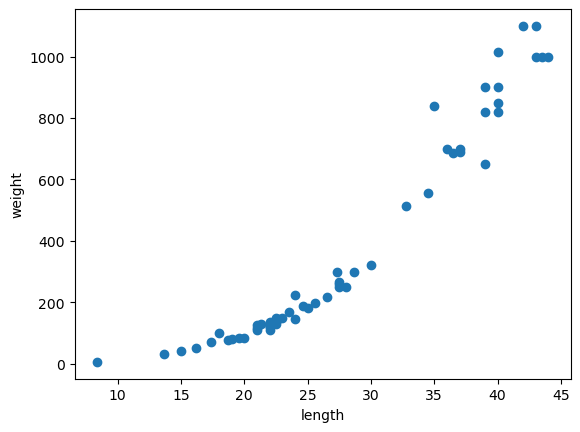

In [100]:
plt.scatter(perchdf.Length,perchdf.Weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

2) feature-target 분리

In [101]:
feature=perchdf[['Length']]
target=perchdf['Weight']

print(f'feature: {feature.shape},{feature.ndim}d')
print(f'target: {target.shape},{target.ndim}d')

feature: (56, 1),2d
target: (56,),1d


3) 데이터셋 준비

In [102]:
from sklearn.model_selection import  train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,random_state=10)

In [104]:
print(f'x_train:{x_train.shape},{x_train.ndim}D')
print(f'y_train:{y_train.shape},{y_train.ndim}D')

print(f'x_test:{x_test.shape},{x_test.ndim}D')
print(f'y_test:{y_test.shape},{y_test.ndim}D')

x_train:(42, 1),2D
y_train:(42,),1D
x_test:(14, 1),2D
y_test:(14,),1D


In [105]:
y_train.head()

7       80.0
6       78.0
43     690.0
53    1100.0
45     650.0
Name: Weight, dtype: float64

In [106]:
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

feature 스케일링

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
mmscaler=MinMaxScaler()

In [109]:
mmscaler.fit(x_train)

MinMaxScaler()

In [110]:
mmscaler.min_,mmscaler.data_min_,mmscaler.scale_,mmscaler.data_max_

(array([-0.23595506]), array([8.4]), array([0.02808989]), array([44.]))

In [111]:
x_train_scaled=mmscaler.transform(x_train)
x_train_scaled.shape,x_train_scaled.min(),x_train_scaled.max()

((42, 1), 0.0, 0.9999999999999999)

In [112]:
x_test_scaled=mmscaler.transform(x_test)
x_test_scaled.shape,x_test_scaled.min(),x_test_scaled.max()

((14, 1), 0.18539325842696627, 0.8595505617977527)

4) 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행: fit()

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [114]:
model=KNeighborsRegressor()

In [115]:
model.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [116]:
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 42, 'euclidean', {})

5) 최적의 k 개수 찾기

In [117]:
scores={}

for k in range(1,model.n_samples_fit_+1):
    # 최근접 이웃 개수 설정(모델의 성능 좌우함): 하이퍼 파라미터
    model.n_neighbors=k
    score=model.score(x_test_scaled,y_test)
    scores[k]=score

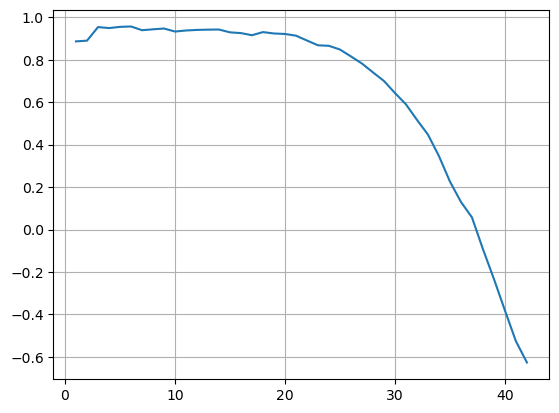

In [118]:
#시각화
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [119]:
best_k=sorted(scores.items(),key=lambda x:x[1],reverse=True)[0][0]
best_k

6

In [120]:
model.n_neighbors=best_k

6) 새로운 데이터 무게 예측하기

In [121]:
new_length=input('농어 길이: ')
print(f'new_length: {new_length}')

new_length: 44


In [122]:
#스케일링 적용
df=pd.DataFrame([[new_length]], columns=['Length'])                
df

,Length
0,44


In [123]:
data_scaled=mmscaler.transform(df)
data_scaled

array([[1.]])

In [124]:
model.predict(data_scaled)

array([1008.33333333])

In [125]:
dis,ind=model.kneighbors(data_scaled)
print(dis,ind,sep='\n')

[[0.         0.01404494 0.02808989 0.02808989 0.05617978 0.11235955]]
[[31 27 30  3 15 12]]


In [126]:
x_train.iloc[ind.reshape(-1)]

,Length
31,44.0
27,43.5
30,43.0
3,43.0
15,42.0
12,40.0


In [127]:
x_train_scaled[[31,27,30,3,15,12]]

array([[1.        ],
       [0.98595506],
       [0.97191011],
       [0.97191011],
       [0.94382022],
       [0.88764045]])

In [128]:
y_train[[31,27,30,3,15,12]]

31    1000.0
27    1000.0
30    1000.0
3     1100.0
15    1100.0
12     850.0
Name: Weight, dtype: float64

In [129]:
y_train.index

RangeIndex(start=0, stop=42, step=1)

In [130]:
y_train[ind.reshape(-1)]

31    1000.0
27    1000.0
30    1000.0
3     1100.0
15    1100.0
12     850.0
Name: Weight, dtype: float64

In [131]:
y_train[ind.reshape(-1)].sum()/model.n_neighbors

1008.3333333333334

[KNN Regressor 단점/문제점]

In [143]:
#임의의 데이터
new=52

datadf=pd.DataFrame([[new]],columns=['Length'])

scaled_data=mmscaler.transform(datadf)

In [144]:
model.predict(scaled_data)

array([1008.33333333])

In [145]:
#임의의 데이터
new=4

datadf=pd.DataFrame([[new]],columns=['Length'])

scaled_data=mmscaler.transform(datadf)

In [146]:
model.predict(scaled_data)

array([60.98333333])

- 학습 데이터 셋의 범위를 벗어나는 더 큰/작은 데이터의 경우, 정확한 예측 불가